# Enron dataset analysis

In [22]:
# built-in libs
import email


# processing libs
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


# visualization libs
import matplotlib.pyplot as plt
%matplotlib inline

# display libs
from tqdm import tqdm

## Read data

In [2]:
emails_full_df = pd.read_csv('emails.csv', chunksize=10000)
emails_df = next(emails_full_df)

In [3]:
print(emails_df.shape)
emails_df.head()

(10000, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
file       10000 non-null object
message    10000 non-null object
dtypes: object(2)
memory usage: 156.3+ KB


## Cleaning data

In [5]:
msg = email.message_from_string(emails_df.message[0])
print('From: %s' % msg['from'])
print('To:   %s' % msg['to'])
print()
print(msg.get_payload(decode=True))

From: phillip.allen@enron.com
To:   tim.belden@enron.com

b'Here is our forecast\n\n '


In [6]:
%time
messages_obj_lst = []
messages_str_lst = []

for i in tqdm(range(emails_df.shape[0])):
    msg = email.message_from_string(emails_df.message[i])
    payload = msg.get_payload() #decode=True
    
    messages_obj_lst.append(msg)
    messages_str_lst.append(payload) #.encode('utf-8').decode('unicode_escape')
    #except KeyboardInterrupt:
    #    break

print('messages_obj_lst size: %i' % len(messages_obj_lst))

Wall time: 0 ns


100%|██████████████████████████████████| 10000/10000 [00:07<00:00, 1347.47it/s]


messages_obj_lst size: 10000


In [44]:
# update dataframe object
#emails_df.rename(columns = {'message':'message_obj'}, inplace = True)
emails_df = emails_df.assign(message_obj = pd.Series(messages_obj_lst).values)
emails_df = emails_df.assign(payload     = pd.Series(messages_str_lst).values)

#print(emails_df.payload.str.contains(r'\\'))
emails_df['payload'] = emails_df.payload.str.replace(r'\n', '')

In [45]:
emails_df.head()

,file,message,message_obj,payload
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"[Message-ID, Date, From, To, Subject, Mime-Ver...",Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"[Message-ID, Date, From, To, Subject, Mime-Ver...",Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"[Message-ID, Date, From, To, Subject, Mime-Ver...",test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"[Message-ID, Date, From, To, Subject, Mime-Ver...","Randy, Can you send me a schedule of the salar..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"[Message-ID, Date, From, To, Subject, Mime-Ver...",Let's shoot for Tuesday at 11:45.


## Word cloud

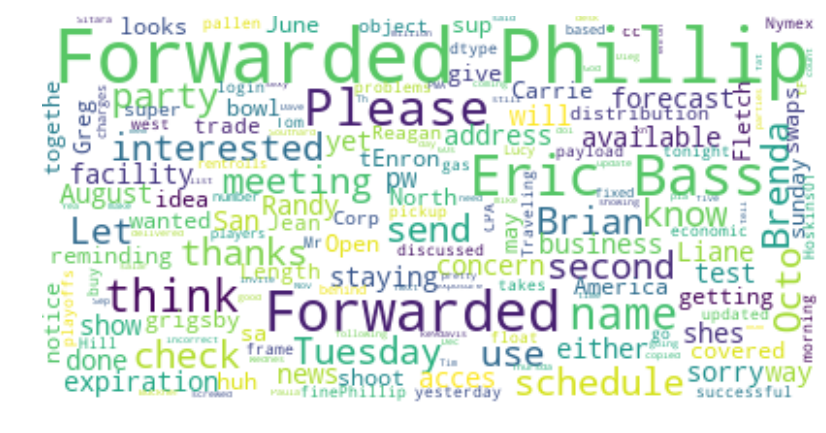

In [46]:
wordcloud = WordCloud(
    #width=1200,
    #height=800,
    margin=0,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
 ).generate(str(emails_df['payload']))

plt.rcParams['figure.dpi'] = 600 #72
plt.rcParams['figure.figsize'] = (10,8)

print(wordcloud)
plt.imshow(wordcloud, interpolation='bilinear') #, interpolation='bilinear'
plt.axis('off')
plt.show()

## NLP tools

In [47]:
import nltk
from nltk.corpus import stopwords

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [ ]:
# sentim_analyzer = SentimentAnalyzer()
# all_words_neg = sentim_analyzer.all_words()